In [2]:
import numpy as np
import pandas as pd
import random, operator, copy
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from ga import init_pop, sort_pop, next_pop
from util import split

## Constants

In [3]:
X_NUM = 8
Y_NUM = 2
TRAIN_NUM = 600
PLOT_TICK = 25
FOLD_NUM = 5

## Dataset Initialization

In [4]:
# initialization for data set and device
dataset = pd.read_csv('../diabetes.txt', sep='\t', header=None).values[:, 1:]
random.shuffle(dataset)
data = dataset[:, :-2]
label = dataset[:, -2:]
X_train_val, y_train_val, X_test, y_test = split(data, label, TRAIN_NUM)
print(X_train_val.shape)
print(y_train_val.shape)
print(X_test.shape)
print(y_test.shape)

# intialization of the split
kf = kf = KFold(n_splits = FOLD_NUM)

(600, 8)
(600, 2)
(168, 8)
(168, 2)


## Tune Hidden Layers

In [4]:
# Hyper-parameters need to be tuned by K-folder corss validation
MR = 0.1 # mutation rate
CR = 0.93 # crossover rate
popSize = 50
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
Hidden_NUM = [1, 2, 3]

In [5]:
%%time
results = []
hyper_id = 0
for num_layer in Hidden_NUM:
    hyper_id += 1
    
    k_validation_results = []
    
    ##################################
    # use different hidden layer
    HIDDEN = []
    for i in range(num_layer):
        HIDDEN.append(10)
    ##################################    
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
                ###########################################################################################################
                print("Folder %d, Iteration %02d (with %d hidden layers): train_acc %lf, best train_cc %lf, validation_acc %lf, best validation_acc %lf "%
                      (folder_id, g+1, num_layer, fitness[0], best_fitness, acc_val, best_acc_val))
                ###########################################################################################################0
        
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    print("Result of the %d-th hyper-parameter: "%(hyper_id))
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    results.append(np.mean(k_validation_results))

Folder 1, Iteration 25 (with 1 hidden layers): train_acc 0.747917, best train_cc 0.747917, validation_acc 0.733333, best validation_acc 0.733333 
Folder 1, Iteration 50 (with 1 hidden layers): train_acc 0.758333, best train_cc 0.758333, validation_acc 0.741667, best validation_acc 0.741667 
Folder 1, Iteration 75 (with 1 hidden layers): train_acc 0.772917, best train_cc 0.772917, validation_acc 0.741667, best validation_acc 0.741667 
Folder 1, Iteration 100 (with 1 hidden layers): train_acc 0.775000, best train_cc 0.775000, validation_acc 0.750000, best validation_acc 0.750000 
Folder 1, Iteration 125 (with 1 hidden layers): train_acc 0.777083, best train_cc 0.777083, validation_acc 0.775000, best validation_acc 0.775000 
Folder 1, Iteration 150 (with 1 hidden layers): train_acc 0.777083, best train_cc 0.777083, validation_acc 0.775000, best validation_acc 0.775000 
Folder 1, Iteration 175 (with 1 hidden layers): train_acc 0.787500, best train_cc 0.787500, validation_acc 0.800000, best

Folder 3, Iteration 400 (with 1 hidden layers): train_acc 0.818750, best train_cc 0.818750, validation_acc 0.675000, best validation_acc 0.700000 
Folder 3, Iteration 425 (with 1 hidden layers): train_acc 0.818750, best train_cc 0.818750, validation_acc 0.675000, best validation_acc 0.700000 
Folder 3, Iteration 450 (with 1 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.700000, best validation_acc 0.700000 
Folder 3, Iteration 475 (with 1 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.700000, best validation_acc 0.700000 
Folder 3, Iteration 500 (with 1 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.700000, best validation_acc 0.700000 
Result of the 3-th folder: 
Higest valdiation accuracy: 0.700000
Folder 4, Iteration 25 (with 1 hidden layers): train_acc 0.779167, best train_cc 0.779167, validation_acc 0.741667, best validation_acc 0.741667 
Folder 4, Iteration 50 (with 1 hidden layers): train_a

Folder 1, Iteration 250 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, best validation_acc 0.858333 
Folder 1, Iteration 275 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, best validation_acc 0.858333 
Folder 1, Iteration 300 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.841667, best validation_acc 0.858333 
Folder 1, Iteration 325 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, best validation_acc 0.858333 
Folder 1, Iteration 350 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, best validation_acc 0.858333 
Folder 1, Iteration 375 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, best validation_acc 0.858333 
Folder 1, Iteration 400 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.858333, b

Folder 4, Iteration 125 (with 2 hidden layers): train_acc 0.804167, best train_cc 0.804167, validation_acc 0.758333, best validation_acc 0.758333 
Folder 4, Iteration 150 (with 2 hidden layers): train_acc 0.804167, best train_cc 0.804167, validation_acc 0.758333, best validation_acc 0.758333 
Folder 4, Iteration 175 (with 2 hidden layers): train_acc 0.804167, best train_cc 0.804167, validation_acc 0.758333, best validation_acc 0.758333 
Folder 4, Iteration 200 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.758333, best validation_acc 0.758333 
Folder 4, Iteration 225 (with 2 hidden layers): train_acc 0.820833, best train_cc 0.820833, validation_acc 0.758333, best validation_acc 0.758333 
Folder 4, Iteration 250 (with 2 hidden layers): train_acc 0.822917, best train_cc 0.822917, validation_acc 0.766667, best validation_acc 0.766667 
Folder 4, Iteration 275 (with 2 hidden layers): train_acc 0.822917, best train_cc 0.822917, validation_acc 0.766667, b

Folder 1, Iteration 500 (with 3 hidden layers): train_acc 0.822917, best train_cc 0.822917, validation_acc 0.850000, best validation_acc 0.850000 
Result of the 1-th folder: 
Higest valdiation accuracy: 0.850000
Folder 2, Iteration 25 (with 3 hidden layers): train_acc 0.762500, best train_cc 0.762500, validation_acc 0.650000, best validation_acc 0.650000 
Folder 2, Iteration 50 (with 3 hidden layers): train_acc 0.783333, best train_cc 0.783333, validation_acc 0.716667, best validation_acc 0.716667 
Folder 2, Iteration 75 (with 3 hidden layers): train_acc 0.789583, best train_cc 0.789583, validation_acc 0.700000, best validation_acc 0.716667 
Folder 2, Iteration 100 (with 3 hidden layers): train_acc 0.789583, best train_cc 0.789583, validation_acc 0.700000, best validation_acc 0.716667 
Folder 2, Iteration 125 (with 3 hidden layers): train_acc 0.791667, best train_cc 0.791667, validation_acc 0.691667, best validation_acc 0.716667 
Folder 2, Iteration 150 (with 3 hidden layers): train_ac

Folder 4, Iteration 375 (with 3 hidden layers): train_acc 0.808333, best train_cc 0.808333, validation_acc 0.816667, best validation_acc 0.816667 
Folder 4, Iteration 400 (with 3 hidden layers): train_acc 0.810417, best train_cc 0.810417, validation_acc 0.808333, best validation_acc 0.816667 
Folder 4, Iteration 425 (with 3 hidden layers): train_acc 0.810417, best train_cc 0.810417, validation_acc 0.808333, best validation_acc 0.816667 
Folder 4, Iteration 450 (with 3 hidden layers): train_acc 0.810417, best train_cc 0.810417, validation_acc 0.808333, best validation_acc 0.816667 
Folder 4, Iteration 475 (with 3 hidden layers): train_acc 0.810417, best train_cc 0.810417, validation_acc 0.808333, best validation_acc 0.816667 
Folder 4, Iteration 500 (with 3 hidden layers): train_acc 0.810417, best train_cc 0.810417, validation_acc 0.808333, best validation_acc 0.816667 
Result of the 4-th folder: 
Higest valdiation accuracy: 0.816667
Folder 5, Iteration 25 (with 3 hidden layers): train_

[0.7816666666666666, 0.7983333333333332, 0.7966666666666667]


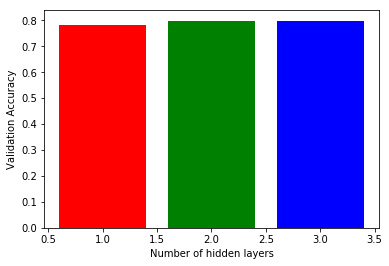

In [6]:
print(results)
plt.bar(Hidden_NUM, results, color = 'rgb')
plt.xlabel('Number of hidden layers')
plt.ylabel('Validation Accuracy')
plt.show()

## Tune Hidden Units

In [4]:
# Hyper-parameters need to be tuned by K-folder corss validation
MR = 0.1 # mutation rate
CR = 0.93 # crossover rate
popSize = 50
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
HIDDENs = [[20, 20], [20, 60], [20, 100],
           [60, 20], [60, 60], [60, 100],
           [100, 20], [100, 60], [100, 100]]

In [5]:
%%time
results = []
hyper_id = 0
for HIDDEN in HIDDENs:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    print("Result of the %d-th hyper-parameter: "%(hyper_id))
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.733333
Result of the 4-th folder: 
Higest valdiation accuracy: 0.816667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.716667
Result of the 1-th hyper-parameter: 
Average valdiation accuracy: 0.756667
Result of the 1-th folder: 
Higest valdiation accuracy: 0.716667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 3-th folder: 
Higest valdiation accuracy: 0.675000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.816667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.733333
Result of the 2-th hyper-parameter: 
Average valdiation accuracy: 0.745000
Result of the 1-th folder: 
Higest valdiation accuracy: 0.708333
Result of the 2-th folder: 
Higest valdiation accuracy: 0.725000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.708333
Resul

In [6]:
print(results)

[0.7566666666666666, 0.7449999999999999, 0.7466666666666666, 0.7616666666666666, 0.7533333333333334, 0.775, 0.7583333333333334, 0.7616666666666666, 0.7466666666666667]


In [4]:
# Hyper-parameters need to be tuned by K-folder corss validation
MR = 0.1 # mutation rate
CR = 0.93 # crossover rate
popSize = 50
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
HIDDENs = [[10, 10], [10, 20], [10, 30],[10, 40], [10, 50], [10, 60],
           [20, 10], [20, 20], [20, 30],[20, 40], [20, 50], [20, 60],
           [30, 10], [30, 20], [30, 30],[30, 40], [30, 50], [30, 60],
           [40, 10], [40, 20], [40, 30],[40, 40], [40, 50], [40, 60],
           [50, 10], [50, 20], [50, 30],[50, 40], [50, 50], [50, 60],
           [60, 10], [60, 20], [60, 30],[60, 40], [60, 50], [60, 60]]

In [5]:
%%time
results = []
hyper_id = 0
for HIDDEN in HIDDENs:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    print("Result of the %d-th hyper-parameter: "%(hyper_id))
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 5-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 1-th hyper-parameter: 
Average valdiation accuracy: 0.765000
Result of the 1-th folder: 
Higest valdiation accuracy: 0.816667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 4-th folder: 
Higest valdiation accuracy: 0.841667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 2-th hyper-parameter: 
Average valdiation accuracy: 0.788333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.725000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.741667
Resul

Result of the 5-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 16-th hyper-parameter: 
Average valdiation accuracy: 0.770000
Result of the 1-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 5-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 17-th hyper-parameter: 
Average valdiation accuracy: 0.766667
Result of the 1-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.800000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 18-th hyper-parameter: 
Average valdiation accuracy: 0.763333
Result of the 1-th folder: 
Higest valdiation accuracy: 0

Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 4-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 5-th folder: 
Higest valdiation accuracy: 0.733333
Result of the 32-th hyper-parameter: 
Average valdiation accuracy: 0.753333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 2-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 5-th folder: 
Higest valdiation accuracy: 0.733333
Result of the 33-th hyper-parameter: 
Average valdiation accuracy: 0.763333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.816667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 3-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.800000
Res

In [6]:
print(results)
print(results[np.argmax(results)])
best_HIDDEN = HIDDENs[np.argmax(results)]
print(best_HIDDEN)

[0.7649999999999999, 0.7883333333333333, 0.755, 0.7716666666666667, 0.7616666666666667, 0.7649999999999999, 0.7699999999999999, 0.7649999999999999, 0.7583333333333333, 0.7649999999999999, 0.7583333333333334, 0.76, 0.7699999999999999, 0.7866666666666666, 0.7783333333333334, 0.7699999999999999, 0.7666666666666666, 0.7633333333333334, 0.7566666666666667, 0.7683333333333333, 0.7849999999999999, 0.7833333333333332, 0.7666666666666666, 0.7300000000000001, 0.7683333333333333, 0.7866666666666666, 0.775, 0.775, 0.7583333333333333, 0.79, 0.7716666666666667, 0.7533333333333333, 0.7633333333333333, 0.79, 0.7716666666666667, 0.7716666666666666]
0.79
[50, 60]


## Tune Crossover Rate

In [7]:
# Hyper-parameters need to be tuned by K-folder corss validation
HIDDEN = best_HIDDEN
MR = 0.1 # mutation rate
popSize = 50
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
CRs = [0.85, 0.875, 0.9, 0.925, 0.95, 0.975]

In [8]:
%%time
results = []
hyper_id = 0
for CR in CRs:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    #########################################################
    print("Result of the %d-th hyper-parameter %lf: "%(hyper_id, CR))
    #########################################################
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 2-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 5-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 1-th hyper-parameter 0.850000: 
Average valdiation accuracy: 0.756667
Result of the 1-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 2-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 5-th folder: 
Higest valdiation accuracy: 0.800000
Result of the 2-th hyper-parameter 0.875000: 
Average valdiation accuracy: 0.783333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 2-th folder: 
Higest valdiation accuracy: 0.825000
Result of the 3-th folder: 
Higest valdiation accura

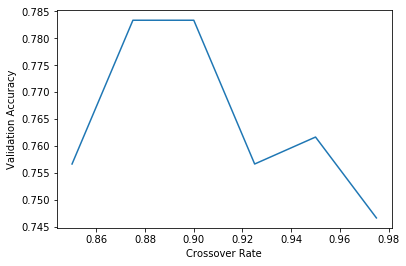

[0.7566666666666666, 0.7833333333333334, 0.7833333333333333, 0.7566666666666666, 0.7616666666666667, 0.7466666666666667]
0.7833333333333334
0.875


In [9]:
plt.plot(CRs, results)
plt.xlabel('Crossover Rate')
plt.ylabel('Validation Accuracy')
plt.show()

print(results)
print(results[np.argmax(results)])
best_CR = CRs[np.argmax(results)]
print(best_CR)

## Tune Mutation Rate

In [10]:
# Hyper-parameters need to be tuned by K-folder corss validation
HIDDEN = best_HIDDEN
CR = best_CR
popSize = 50
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
MRs = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

In [11]:
%%time
results = []
hyper_id = 0
for MR in MRs:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    #########################################################
    print("Result of the %d-th hyper-parameter %lf: "%(hyper_id, MR))
    #########################################################
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 2-th folder: 
Higest valdiation accuracy: 0.733333
Result of the 3-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 4-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 1-th hyper-parameter 0.050000: 
Average valdiation accuracy: 0.753333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.725000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 2-th hyper-parameter 0.100000: 
Average valdiation accuracy: 0.758333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.800000
Result of the 2-th folder: 
Higest valdiation accuracy: 0.775000
Result of the 3-th folder: 
Higest valdiation accura

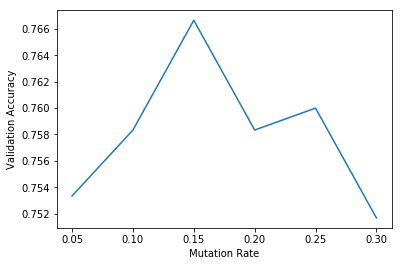

[0.7533333333333333, 0.7583333333333333, 0.7666666666666667, 0.7583333333333333, 0.76, 0.7516666666666667]
0.7666666666666667
0.15


In [12]:
plt.plot(MRs, results)
plt.xlabel('Mutation Rate')
plt.ylabel('Validation Accuracy')
plt.show()

print(results)
print(results[np.argmax(results)])
best_MR = MRs[np.argmax(results)]
print(best_MR)

## Tune Population Size

In [13]:
# Hyper-parameters need to be tuned by K-folder corss validation
HIDDEN = best_HIDDEN
CR = best_CR
MR = best_MR
elitePer = 0.1

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
popSizes = [40, 50, 60, 70, 80, 90, 100]

In [14]:
%%time
results = []
hyper_id = 0
for popSize in popSizes:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    #########################################################
    print("Result of the %d-th hyper-parameter %d: "%(hyper_id, popSize))
    #########################################################
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.841667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 3-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.725000
Result of the 5-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 1-th hyper-parameter 40: 
Average valdiation accuracy: 0.766667
Result of the 1-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.758333
Result of the 3-th folder: 
Higest valdiation accuracy: 0.725000
Result of the 4-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 5-th folder: 
Higest valdiation accuracy: 0.675000
Result of the 2-th hyper-parameter 50: 
Average valdiation accuracy: 0.740000
Result of the 1-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.750000

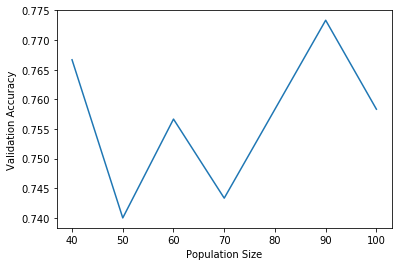

[0.7666666666666667, 0.74, 0.7566666666666666, 0.7433333333333334, 0.7583333333333333, 0.7733333333333333, 0.7583333333333334]
0.7733333333333333
90


In [15]:
plt.plot(popSizes, results)
plt.xlabel('Population Size')
plt.ylabel('Validation Accuracy')
plt.show()

print(results)
print(results[np.argmax(results)])
best_popSize = popSizes[np.argmax(results)]
print(best_popSize)

## Tune Elite Percentage

In [17]:
# Hyper-parameters need to be tuned by K-folder corss validation
HIDDEN = best_HIDDEN
CR = best_CR
MR = best_MR
popSize = best_popSize

# Hyper-parameters need to be tuned by observation
num_generations = 500
BATCH = 500

# Hyper-parameters tuned in this block
elitePers = [0.05, 0.1, 0.15, 0.2, 0.25]

In [18]:
%%time
results = []
hyper_id = 0
for elitePer in elitePers:
    print("==============================================================")
    hyper_id += 1
    k_validation_results = []   
    
    # train on 5 folds for each hyper-parameters
    folder_id = 0
    for train_index, val_index in kf.split(X_train_val):
        folder_id += 1
        # intialization
        fitness = None
        best_acc_val = 0
        best_fitness = 0
        pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])
        
        # Split into training set and validation set
        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]
        
        # Training
        for g in range(num_generations):
            fitness, pop = next_pop(pop, CR, MR, elitePer, fitness, X_train, y_train, 1)
            best_fitness = fitness[0] if fitness[0] > best_fitness else best_fitness
            if (g+1)%PLOT_TICK==0:
                # Calculate accuracy for the validation set
                _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)

                # Select the best model based on the validation score
                if acc_val >= best_acc_val:
                    best_acc_val = acc_val
                    
        # Store the information of the current validation folder
        k_validation_results.append(best_acc_val)
        print("Result of the %d-th folder: "%(folder_id))
        print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    # Calculate the average performance for each hyper-parameters on each folders
    #########################################################
    print("Result of the %d-th hyper-parameter %lf: "%(hyper_id, elitePer))
    #########################################################
    print("Average valdiation accuracy: %lf"%(np.mean(k_validation_results)))
    print("==============================================================")
    results.append(np.mean(k_validation_results))

Result of the 1-th folder: 
Higest valdiation accuracy: 0.816667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accuracy: 0.766667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.783333
Result of the 5-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 1-th hyper-parameter 0.050000: 
Average valdiation accuracy: 0.781667
Result of the 1-th folder: 
Higest valdiation accuracy: 0.800000
Result of the 2-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 3-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 4-th folder: 
Higest valdiation accuracy: 0.791667
Result of the 5-th folder: 
Higest valdiation accuracy: 0.741667
Result of the 2-th hyper-parameter 0.100000: 
Average valdiation accuracy: 0.763333
Result of the 1-th folder: 
Higest valdiation accuracy: 0.841667
Result of the 2-th folder: 
Higest valdiation accuracy: 0.750000
Result of the 3-th folder: 
Higest valdiation accura

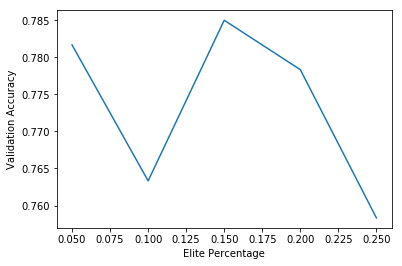

[0.7816666666666666, 0.7633333333333333, 0.7849999999999999, 0.7783333333333333, 0.7583333333333333]
0.7849999999999999
0.15


In [19]:
plt.plot(elitePers, results)
plt.xlabel('Elite Percentage')
plt.ylabel('Validation Accuracy')
plt.show()

print(results)
print(results[np.argmax(results)])
best_elitePer = elitePers[np.argmax(results)]
print(best_elitePer)

## Training and Testing

In [13]:
# Hyper-parameters need to be tuned by K-folder corss validation
HIDDEN = [50, 60]
CR = 0.875
MR = 0.15
popSize = 90
elitePer = 0.15

# Hyper-parameters need to be tuned by observation
num_generations = 400
BATCH = 500

In [14]:
# for each iteration, there is a history list, a best model with the highest validation accuracy recorded each 10 generations
best_fitness_hist = []
val_acc_hist = []
best_models = []
best_val_accs = []

for i in range(10):
    # initialize parameters
    fitness = None

    best_acc_val = 0
    best_fitness_hist = []
    val_acc_hist = []
    best_model = None
    X_train, y_train, X_val, y_val = split(X_train_val, y_train_val, 500)
    pop = init_pop(popSize, [X_NUM] + HIDDEN + [Y_NUM])

    for g in range(num_generations):
        X_batch, y_batch, _, __ = split(X_train, y_train, BATCH)
        fitness, pop = next_pop(pop, CR, MR, 
                                elitePer, fitness, 
                                X_batch, y_batch, 1)
        
        if (g+1)%(PLOT_TICK)==0:
            # Calculate accuracy for the validation set
            _, acc_val, __=pop[0].forward(X_val, y_val, 'ReLU', 1)
            
            # Record the accuracy each 50 generations
            best_fitness_hist.append(fitness[0])
            val_acc_hist.append(acc_val)
            
            # Select the best model based on the validation score
            if acc_val >= best_acc_val:
                best_acc_val = acc_val
                best_model = pop[0]
                
            print("Iteration %02d: Training set acc %lf, Validation set acc %lf "%(g+1, best_fitness_hist[-1], acc_val))
    
    print("Result of the %d-th iteration: "%(i))
    print("Higest valdiation accuracy: %lf"%(best_acc_val))
    
    best_val_accs.append(best_acc_val)
    best_models.append(best_model)


Iteration 25: Training set acc 0.724000, Validation set acc 0.670000 
Iteration 50: Training set acc 0.736000, Validation set acc 0.730000 
Iteration 75: Training set acc 0.750000, Validation set acc 0.660000 
Iteration 100: Training set acc 0.756000, Validation set acc 0.650000 
Iteration 125: Training set acc 0.756000, Validation set acc 0.650000 
Iteration 150: Training set acc 0.770000, Validation set acc 0.740000 
Iteration 175: Training set acc 0.772000, Validation set acc 0.700000 
Iteration 200: Training set acc 0.772000, Validation set acc 0.700000 
Iteration 225: Training set acc 0.778000, Validation set acc 0.780000 
Iteration 250: Training set acc 0.786000, Validation set acc 0.760000 
Iteration 275: Training set acc 0.786000, Validation set acc 0.760000 
Iteration 300: Training set acc 0.786000, Validation set acc 0.730000 
Iteration 325: Training set acc 0.800000, Validation set acc 0.750000 
Iteration 350: Training set acc 0.800000, Validation set acc 0.750000 
Iteration

Iteration 375: Training set acc 0.794000, Validation set acc 0.810000 
Iteration 400: Training set acc 0.794000, Validation set acc 0.810000 
Result of the 6-th iteration: 
Higest valdiation accuracy: 0.820000
Iteration 25: Training set acc 0.724000, Validation set acc 0.710000 
Iteration 50: Training set acc 0.738000, Validation set acc 0.630000 
Iteration 75: Training set acc 0.738000, Validation set acc 0.630000 
Iteration 100: Training set acc 0.744000, Validation set acc 0.650000 
Iteration 125: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 150: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 175: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 200: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 225: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 250: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 275: Training set acc 0.748000, Validation set acc 0.650000 
Iteration 30

In [15]:
print("Validation Errors:")
print(best_val_accs)
print("Mean of validation error: %lf"%(np.mean(best_val_accs)))

Validation Errors:
[0.78, 0.71, 0.72, 0.71, 0.79, 0.8, 0.82, 0.71, 0.77, 0.79]
Mean of validation error: 0.760000


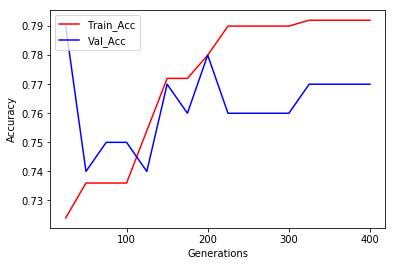

In [16]:
l1,=plt.plot(list(range(PLOT_TICK, num_generations+1, PLOT_TICK)), best_fitness_hist, color='r')
l2,=plt.plot(list(range(PLOT_TICK, num_generations+1, PLOT_TICK)), val_acc_hist, color='b')
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.xticks(np.arange(PLOT_TICK*4, num_generations+1, PLOT_TICK*4))
plt.legend(handles=[l1, l2], labels=['Train_Acc', 'Val_Acc'],  loc='upper left')
plt.show()

In [17]:
acc_test_list = []
for model in best_models:
    _, acc_test, __=model.forward(X_test, y_test, 'ReLU', 1)
    acc_test_list.append(acc_test)
print("Test set Errors:")
print(acc_test_list)
print("Mean of test set error: %lf"%(np.mean(acc_test_list)))

Test set Errors:
[0.7023809523809523, 0.7559523809523809, 0.7916666666666666, 0.7380952380952381, 0.7619047619047619, 0.7857142857142857, 0.7738095238095238, 0.7321428571428571, 0.7321428571428571, 0.7976190476190477]
Mean of test set error: 0.757143
